In [ ]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
import numpy as np
import cv2 as cv

In [ ]:
# !wget 'https://cdn0-production-images-kly.akamaized.net/d6vc-1c_-NkEPZSNAMOkLKctTs4=/640x360/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/954362/original/013743200_1439436703-13082015-borobudur.jpg' -O citra2.jpg
# !wget 'https://pps.whatsapp.net/v/t61.24694-24/301217253_875747900459363_8541850532984248897_n.jpg?ccb=11-4&oh=01_AdQK9CerSpDpXvlV8GkJ2ZlBnND1S9L9wfw8GNNVIFGILw&oe=639B9DBA' -O fotokur.jpg

In [ ]:
# !gdown '1zIkJRK8oqbhFsHEeQzKBmxQD57DCO-fu' -O citra.jpg
# !gdown '1MCXO_gGu-xDirGIXsgfnL-uetIuVbQA-' -O citra2.jpg
# !gdown '15zWg-cRnUWHQoyucEx1kzlweJA6OjFuj' -O citra3.jpg
# !gdown '1NM_nKN1tATfJODqRgh9cMArKz8qgVqjv' -O citra4.jpg
# !gdown '1OiaUC2HYJ29MOgHfT3XpSAFPCp6LApFI' -O citra5.jpg
# !gdown '11oOTon5EswflOvaAWEjS_ekRJ4rEeLXp' -O citra6.jpg
# !gdown '1PJKpWCF0f2aP4HrHZk2XtRNuFt2rWs5I' -O citra7.jpg
# !gdown '1IxTbK1L0iC4hSV_qi-3pB-pRODZUkTZK' -O citra8.jpg
# !gdown '1os5cgpYOy9C5YzkmlqVGGtFjtvGKRFzD' -O citra9.jpg
# !gdown '1ZeohIg2tLwTQYVmW0omm-wfaXB5zc5yt' -O citra10.jpg
# !gdown '12IkSLdOJULpK-MszxggW3Wk-AYDpa6kl' -O citra11.jpg

## Input, Blur

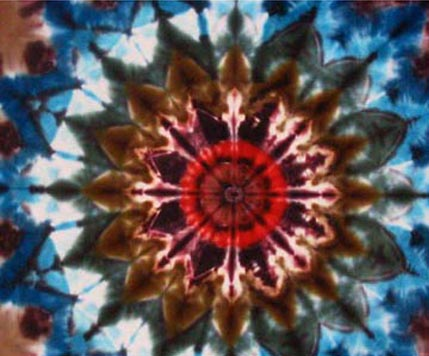

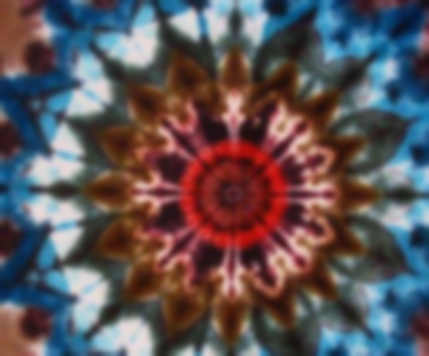

In [ ]:
img_r = cv.imread('citra7.jpg')
imshow(img_r)

img = cv.GaussianBlur(img_r,(15,15),0)
imshow(img)

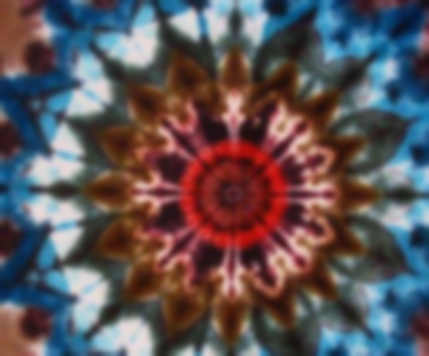

(356, 429, 3)

In [ ]:
# resize

if img.shape[0] > 500 or img.shape[1] > 500:
  scale_percent = 50 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
    
  # resize image
  img_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
  img_r = cv.resize(img_r, dim, interpolation = cv.INTER_AREA)

else:
  img_resized = np.copy(img)
  img_r = np.copy(img_r)

imshow(img_resized)
img_resized.shape

## Proses

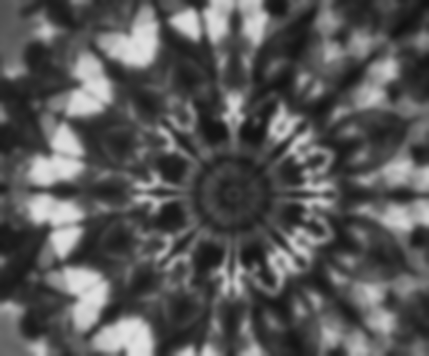

In [ ]:
img_gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
imshow(img_gray)

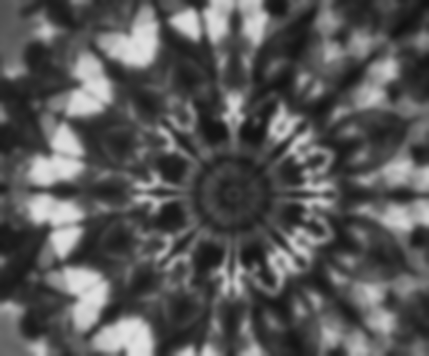

In [ ]:
# img_gaussian = cv.GaussianBlur(img_gray,(3,3),0)
img_gaussian = np.copy(img_gray)
imshow(img_gaussian)

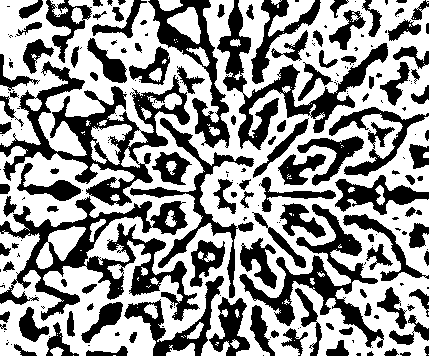

In [ ]:
img_adapt = cv.adaptiveThreshold(img_gaussian,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,15,2)
# img_adapt_inv = cv.bitwise_not(cv.adaptiveThreshold(img_gaussian,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,15,2))

# img_adapt_gauss = img_adapt_inv
img_adapt_gauss = img_adapt

imshow(img_adapt_gauss)

In [ ]:
# jenis - jenis kernel
# cv.getStructuringElement(cv.MORPH_RECT,(5,5))
# cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
# cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

# custom kernel
# kernel = np.array(
#     [[1,0,1],
#      [0,1,0],
#      [1,0,1]], np.uint8
# )

kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
iterations = 1

In [ ]:
kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [ ]:
# src = np.copy(img_adapt_gauss)
src = cv.bitwise_not(np.copy(img_adapt_gauss))

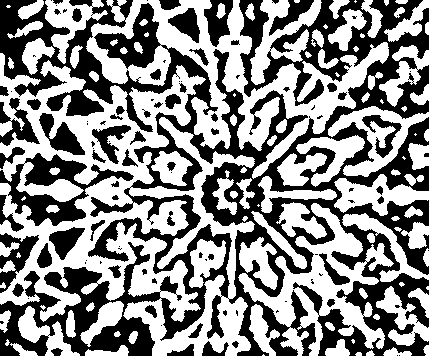

In [ ]:
# dilate

img_dilation = cv.dilate(src, kernel, iterations=1)
imshow(img_dilation)

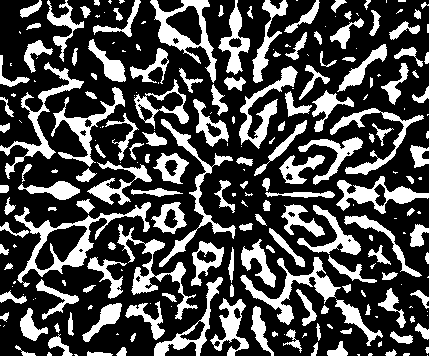

In [ ]:
# erode

img_erosion = cv.erode(src, kernel, iterations=iterations)
imshow(img_erosion)

### custom

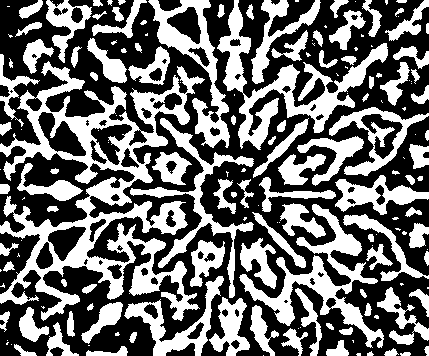

In [ ]:
img_custom = cv.dilate(src, kernel, iterations=1)
img_custom = cv.erode(img_custom, kernel, iterations=1)
imshow(img_custom)

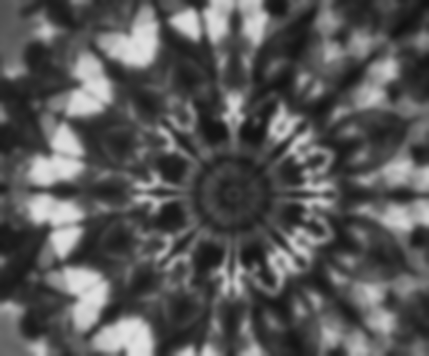

array([[ 81,  81,  82, ...,  18,  17,  18],
       [ 81,  81,  82, ...,  18,  17,  17],
       [ 81,  81,  81, ...,  18,  18,  18],
       ...,
       [101, 102, 102, ...,  94,  91,  90],
       [101, 101, 102, ...,  97,  93,  92],
       [101, 101, 102, ...,  97,  94,  92]], dtype=uint8)

In [ ]:
imshow(img_gaussian)
img_gaussian

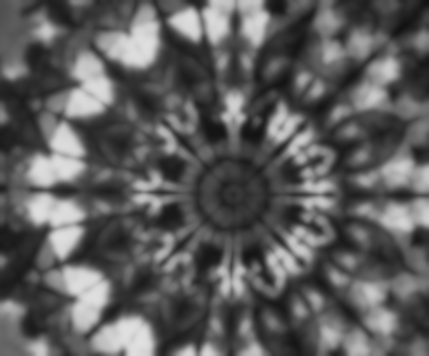

array([[ 81,  82,  83, ...,  18,  18,  18],
       [ 81,  82,  82, ...,  18,  18,  18],
       [ 81,  81,  82, ...,  18,  19,  18],
       ...,
       [102, 102, 103, ..., 100,  94,  92],
       [101, 102, 103, ..., 101,  97,  93],
       [101, 102, 103, ..., 102,  97,  94]], dtype=uint8)

In [ ]:
test = cv.dilate(img_gaussian,kernel, iterations=1)
# test = cv.bitwise_not(test)
imshow(test)
test

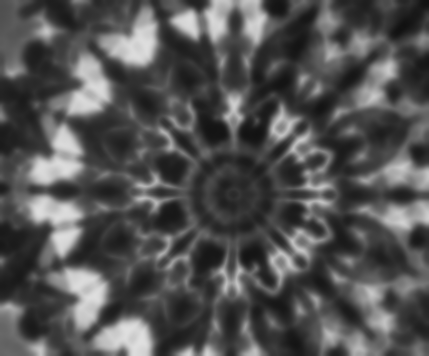

array([[ 81,  81,  81, ...,  17,  17,  17],
       [ 81,  81,  81, ...,  17,  17,  17],
       [ 81,  81,  81, ...,  18,  17,  17],
       ...,
       [101, 101, 102, ...,  91,  88,  87],
       [101, 101, 101, ...,  93,  91,  90],
       [101, 101, 101, ...,  94,  92,  92]], dtype=uint8)

In [ ]:
test2 = cv.erode(img_gaussian,kernel, iterations=1)
# test2 = cv.bitwise_not(test2)
imshow(test2)
test2

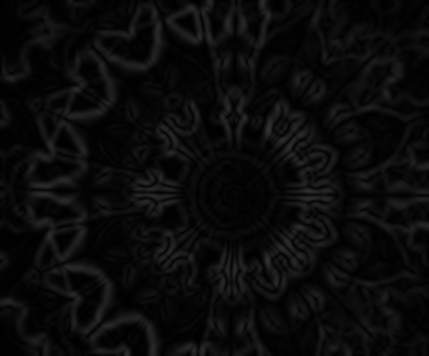

array([[0, 1, 2, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 2, 1],
       ...,
       [1, 1, 1, ..., 9, 6, 5],
       [0, 1, 2, ..., 8, 6, 3],
       [0, 1, 2, ..., 8, 5, 2]], dtype=uint8)

In [ ]:
test3 = test - test2
imshow(test3)
test3

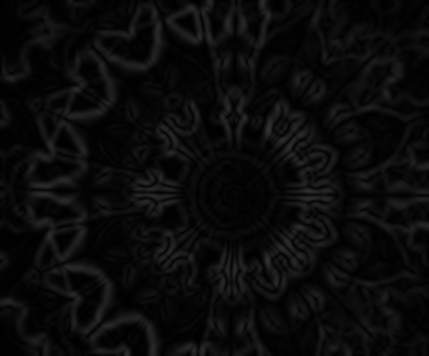

array([[0, 1, 2, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 2, 1],
       ...,
       [1, 1, 1, ..., 9, 6, 5],
       [0, 1, 2, ..., 8, 6, 3],
       [0, 1, 2, ..., 8, 5, 2]], dtype=uint8)

In [ ]:
morphology_gradient = cv.morphologyEx(img_gaussian, cv.MORPH_GRADIENT, kernel)
# morphology_gradient = cv.bitwise_not(morphology_gradient)
imshow(morphology_gradient)
morphology_gradient

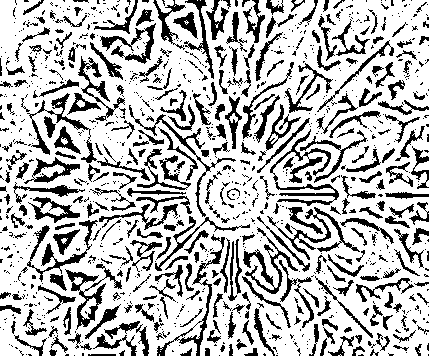

In [ ]:
img_morphology_gradient = cv.adaptiveThreshold(morphology_gradient,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,15,2)
imshow(img_morphology_gradient)

### .

In [ ]:
mask = img_erosion
mask = cv.bitwise_not(mask)
erotion = cv.bitwise_and(img_resized,img_resized,mask = mask)

In [ ]:
mask = img_dilation
mask = cv.bitwise_not(mask)
dilation = cv.bitwise_and(img_resized,img_resized,mask = mask)

In [ ]:
mask = img_morphology_gradient
# mask = cv.bitwise_not(mask)
morphological_g = cv.bitwise_and(img_resized,img_resized,mask = mask)

In [ ]:
mask = img_custom
mask = cv.bitwise_not(mask)
custom = cv.bitwise_and(img_resized,img_resized,mask = mask)

## Output


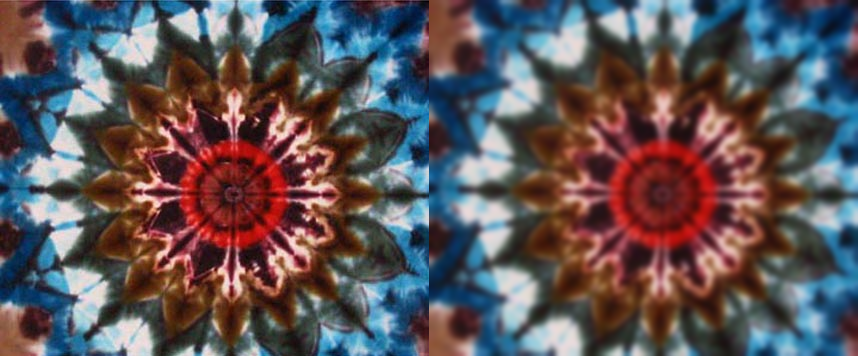

In [ ]:
imshow(np.hstack((img_r,img_resized)))

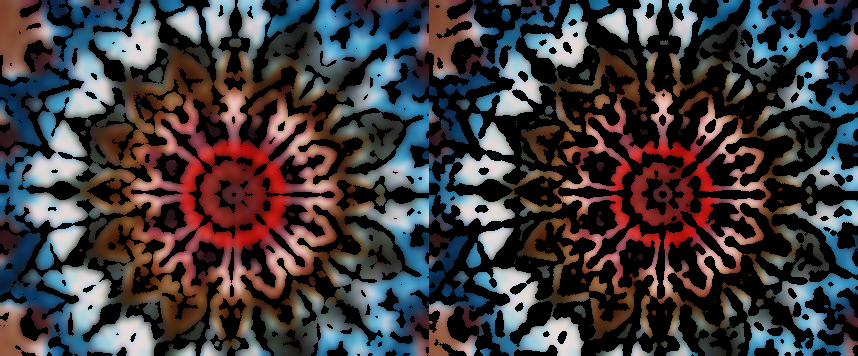

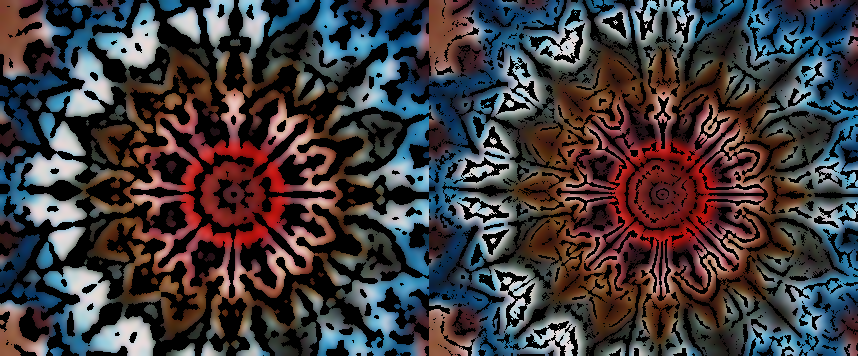

In [ ]:
imshow(np.hstack((erotion,dilation)))
imshow(np.hstack((custom,morphological_g)))